In [1]:
import os, time
import numpy as np
import logging

import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader

from model import *
from dataset import *


import matplotlib.pyplot as plt
import torch.nn.functional as F

class FeatureExtractor(nn.Module):
    def __init__(self, submodule, extracted_layers):
        super(FeatureExtractor,self).__init__()
        self.submodule = submodule
        self.extracted_layers= extracted_layers
 
    def forward(self, x):
        outputs = []
        for name, module in self.submodule._modules.items():
            if name is "fc": x = x.view(x.size(0), -1)
            x = module(x)
            #print(name)
            if name in self.extracted_layers:
                outputs.append(x)
                
        return outputs

def evaluate(dataloader, model, device):
    c = 0
    total_num = 0
    with torch.no_grad():
        for data, target in dataloader:
            data, target = data.to(device), target.to(device).squeeze()
            total_num += len(data)
            out = model(data)
            predicted = torch.max(out, 1)[1]
            c += (predicted == target).sum().item()
    return c * 100.0 / total_num

def score(**kwargs):
    data_dir = kwargs.get('data_dir', './data')
    model_dir = kwargs.get('model_dir', 'models')
    batch_size = kwargs.get('batch_size', 1)

    device = torch.device("cpu")

    eval_dataset = DockDataset(featdir=os.path.join(data_dir, 'test'), is_train=False, shuffle=False)

    eval_loader = DataLoader(
        eval_dataset,
        batch_size=batch_size,
        shuffle=False,
        drop_last=False,
    )
    
    # model = resnet18()
    model = resnet18_lsoftmax(device=device)
    model.load_state_dict(torch.load(os.path.join(model_dir, "model_best.pth")))
    model.to(device)
    model.eval()
    
    #######################################################################
    # conv1 bn1 relu maxpool layer1 layer2 layer3 layer4 avgpool fc
    exact_list = ["conv1"]#["conv1","layer1","layer2","layer3","layer4","avgpool"]
    extractor = FeatureExtractor(model,exact_list)
    with torch.no_grad():
        for data, target in eval_loader:
            isDocks =  target[0].data.numpy()[0]
            if(  isDocks): continue

            x = extractor(data)
            #print (x[0].data)
            for i in range(1):
                ax = plt.subplot(1, 1, i + 1)
                ax.set_title('Sample #{}'.format(i))
                ax.axis('off')
                plt.imshow(x[0].data.numpy()[0,i,:,:],cmap='jet')
                plt.show()
            break


    #######################################################################
#     eval_acc = evaluate(eval_loader, model, device)
#     print(f"Test Accuracy is: {eval_acc:.2f}%")

score()



<Figure size 640x480 with 1 Axes>

conv1
layer1
layer2
layer4
avgpool


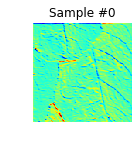

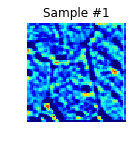

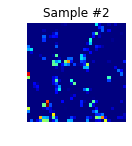

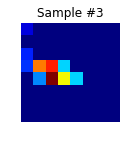

ValueError: num must be 1 <= num <= 4, not 5

<Figure size 432x288 with 0 Axes>

In [75]:
import os, time
import numpy as np
import logging

import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader

from model import *
from dataset import *


import matplotlib.pyplot as plt
import torch.nn.functional as F

class FeatureExtractor(nn.Module):
    def __init__(self, submodule, extracted_layers):
        super(FeatureExtractor,self).__init__()
        self.submodule = submodule
        self.extracted_layers= extracted_layers
 
    def forward(self, x):
        outputs = []
        for name, module in self.submodule._modules.items():
            if name is "fc": x = x.view(x.size(0), -1)
            x = module(x)
            #print(name)
            if name in self.extracted_layers:
                outputs.append(x)
                print(name)
                
        return outputs

def evaluate(dataloader, model, device):
    c = 0
    total_num = 0
    with torch.no_grad():
        for data, target in dataloader:
            data, target = data.to(device), target.to(device).squeeze()
            total_num += len(data)
            out = model(data)
            predicted = torch.max(out, 1)[1]
            c += (predicted == target).sum().item()
    return c * 100.0 / total_num

def score(**kwargs):
    data_dir = kwargs.get('data_dir', './data')
    model_dir = kwargs.get('model_dir', 'models')
    batch_size = kwargs.get('batch_size', 1)

    device = torch.device("cpu")

    eval_dataset = DockDataset(featdir=os.path.join(data_dir, 'test'), is_train=False, shuffle=False)

    eval_loader = DataLoader(
        eval_dataset,
        batch_size=batch_size,
        shuffle=False,
        drop_last=False,
    )
    
    # model = resnet18()
    model = resnet18_lsoftmax(device=device)
    model.load_state_dict(torch.load(os.path.join(model_dir, "model_best.pth")))
    model.to(device)
    model.eval()
    
    #######################################################################
    # conv1 bn1 relu maxpool layer1 layer2 layer3 layer4 avgpool fc
    exact_list = ["conv1","layer1","layer2","layer4","avgpool"]#["conv1","layer1","layer2","layer3","layer4","avgpool"]
    extractor = FeatureExtractor(model,exact_list)
    with torch.no_grad():
        for data, target in eval_loader:
            isDocks =  target[0].data.numpy()[0]
            if( not isDocks): continue
            x = extractor(data)
            #print (x[0].data)
            
            for j in range(len(exact_list)):
                ax = plt.subplot(2, 2, j + 1)
                ax.set_title('Sample #{}'.format(j))
                ax.axis('off')
                plt.imshow(x[j].data.numpy()[0,1,:,:],cmap='jet')
                plt.show()


    #######################################################################
#     eval_acc = evaluate(eval_loader, model, device)
#     print(f"Test Accuracy is: {eval_acc:.2f}%")

score()

